In [1]:
import pandas as pd

In [2]:
column_names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
                'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
                'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

data = pd.read_csv('./wine.csv',names=column_names)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of Diluted Wines  178 non-null    float64
 13  Proli

In [6]:
df.isna().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1].astype(int)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
n_components = len(X.columns)
pca = PCA(n_components=n_components)
pca.fit_transform(X_train)

array([[ 2.52352277,  0.03836841, -0.30636923, ..., -0.13023856,
         0.56298203, -0.09305255],
       [-4.16020518, -0.74065951, -1.41069026, ..., -0.34466738,
        -0.456598  ,  0.31318453],
       [ 1.05621404,  2.43286949, -1.40498156, ..., -0.23819239,
        -0.06871123, -0.00823639],
       ...,
       [ 4.25229838, -2.27210703, -1.03930487, ..., -0.2238914 ,
        -0.13412847, -0.08813621],
       [-1.75475749,  1.59003576, -0.17434373, ..., -0.65624332,
        -0.37048363,  0.29147243],
       [-0.10557028,  1.27121233,  0.78080784, ..., -0.18591201,
        -0.01573722, -0.28815859]])

In [12]:
pca.transform(X_test)

array([[ 2.02765867e+00, -1.07964711e+00, -1.26952255e-01,
         2.69155797e-01,  8.71917855e-01, -5.94676121e-01,
         1.25625913e+00, -4.75486177e-01, -3.19654326e-01,
        -3.22977035e-01, -7.14766370e-01,  2.41143458e-01,
         5.37406061e-02],
       [ 1.11727060e+00, -1.77432528e+00,  1.63261631e-01,
         6.77775852e-01,  2.47553486e-02, -5.37837701e-01,
         1.70402921e+00, -3.46251403e-01, -2.73684220e-01,
         4.20374551e-01,  6.96971383e-01,  6.42340106e-02,
         2.04100266e-01],
       [-2.65120060e+00, -1.92792772e-01,  7.44040897e-01,
        -6.59247539e-01, -7.52635314e-01, -2.20999636e-01,
         6.76356102e-01, -5.59586165e-01,  2.93035664e-01,
         4.28793311e-01, -5.08149902e-01, -4.81373890e-02,
        -5.21066921e-01],
       [ 2.50066977e+00, -1.06607273e+00,  1.41454606e+00,
        -2.69716484e-01, -5.83168853e-01, -3.70223550e-01,
        -7.14430216e-01,  1.04456689e+00,  7.69208634e-01,
        -5.06823382e-01,  4.39184241e

In [13]:
pca.explained_variance_ratio_

array([0.36351132, 0.18633855, 0.11962996, 0.07588251, 0.0699779 ,
       0.04295276, 0.03620701, 0.02658605, 0.0220032 , 0.01905649,
       0.01698521, 0.0132192 , 0.00764984])

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.36351132, 0.54984987, 0.66947983, 0.74536234, 0.81534024,
       0.858293  , 0.89450001, 0.92108606, 0.94308926, 0.96214575,
       0.97913096, 0.99235016, 1.        ])

In [15]:
# Taking 10 features which will give 95% of the total variance

In [16]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)

In [17]:
X_test = pca.transform(X_test)

In [18]:
pca.explained_variance_ratio_

array([0.36351132, 0.18633855, 0.11962996, 0.07588251, 0.0699779 ,
       0.04295276, 0.03620701, 0.02658605, 0.0220032 , 0.01905649])

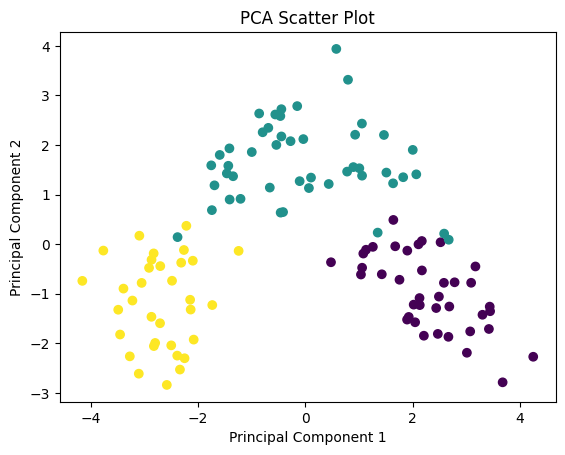

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(y_train), cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

In [20]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(X_train, y_train)

C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [23]:
wcss

[1488.4394704223844,
 1041.4218868950247,
 798.7320112121373,
 713.9156020271464,
 663.7772704724387,
 628.2287282411218,
 590.8507483497083,
 548.3177657110965,
 505.859372628529,
 481.1036302392802]

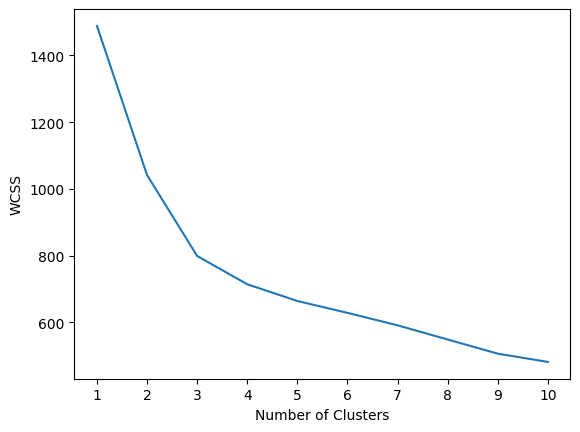

In [24]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [26]:
kmeans = KMeans(n_clusters =3, init='k-means++')

In [27]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\iaman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


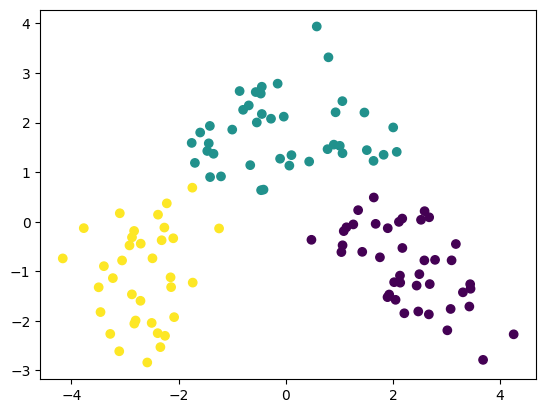

In [28]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [29]:
y_test_labels = kmeans.predict(X_test)
y_test_labels

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

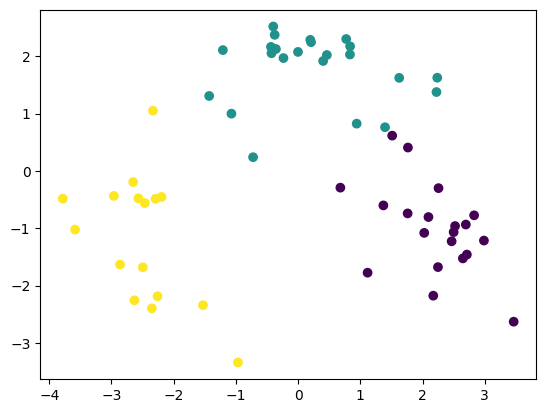

In [30]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, kmeans.labels_)

0.29430704899207694

Interpretation of PCA Results:
The explained variance ratio provides insights into how much variance in the original dataset is captured by each principal component. Looking at explained variance ratio array [0.36351132, 0.18633855, 0.11962996, 0.07588251, 0.0699779 , 0.04295276, 0.03620701, 0.02658605, 0.0220032 , 0.01905649], here's what we can interpret:

- The first principal component (PC1) explains approximately 36.35% of the variance in the data.
- The second principal component (PC2) explains around 18.63% of the variance.
- The third principal component (PC3) explains about 11.96% of the variance.
- ... and so on.

We can see that the contribution of variance decreases as we move to higher-numbered components. This suggests that the first few principal components carry the most information, while the later ones capture less significant variation.

Interpretation of K-Means Clustering Results:
The silhouette score of 0.294 indicates the quality of the clusters formed by the K-Means algorithm. The silhouette score measures how close each data point in one cluster is to the points in the neighboring clusters. A score close to 1 indicates well-defined clusters, while a score near 0 indicates overlapping clusters.

In our case, a silhouette score of 0.294 suggests that the clusters might not be very well-separated. This could mean that the data points are relatively closer to the boundary between clusters. While not extremely high, the score is still positive, indicating that there's some structure in the data that K-Means is able to capture.

Combined Interpretation:
When interpreting the results of PCA and K-Means together, you can consider the following:

1. PCA Results: The first few principal components (e.g., PC1, PC2) contribute significantly to the data's variance. These components might correspond to the most meaningful features or patterns in your dataset.

2. K-Means Results: The silhouette score of 0.294 suggests that while the clusters aren't perfectly distinct, they still exhibit some level of structure. This implies that the K-Means algorithm has found patterns or groupings within the data.

Overall, the combination of PCA and K-Means can provide insights into how your data is distributed and whether distinct clusters can be identified. Remember that interpretation can be context-dependent, so it's essential to consider your domain knowledge and the goals of your analysis when drawing conclusions.